In [4]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt

In [5]:
import cv2

In [6]:
original_img_dir = 'dataset/original_dataset/images/render'

In [7]:

images = [os.path.join(original_img_dir, x) for x in sorted(os.listdir(original_img_dir))]


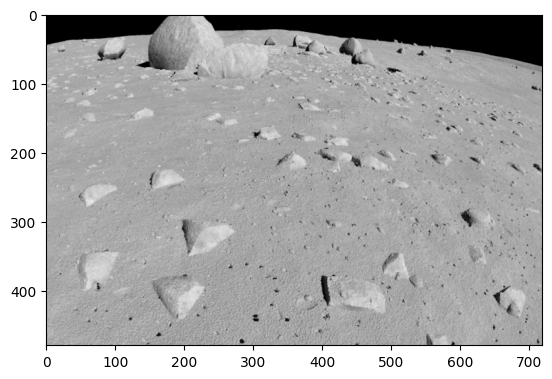

In [8]:
img_path = images[35]


img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image
plt.imshow(img)
plt.show()


In [18]:
def relative_to_absolute(bbox, img_shape):
    img_h, img_w = img_shape[:2]
    x, y, w, h = bbox
    abs_x = int((x-w/2) * img_w)
    abs_y = int((y - h/2) * img_h)
    abs_w = int(w * img_w)
    abs_h = int(h * img_h)
    return abs_x, abs_y, abs_w, abs_h

def draw_bounding_boxes(image, bboxes):
    for bbox in bboxes:
        x, y, w, h = bbox
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return image


In [19]:
csv_file = "bbox_data.csv"  # Replace with your CSV file path
data = pd.read_csv(csv_file, header=0)

grouped_df = data.groupby(data.columns[0]) 
print(grouped_df.get_group('render0002.png'))

            image  center_x  center_y     width    height
1  render0002.png  0.684028  0.943750  0.154167  0.112500
2  render0002.png  0.125000  0.759375  0.080556  0.093750
3  render0002.png  0.085417  0.510417  0.034722  0.050000
4  render0002.png  0.188889  0.398958  0.052778  0.064583
5  render0002.png  0.917361  0.453125  0.165278  0.268750
6  render0002.png  0.697917  0.355208  0.062500  0.085417
7  render0002.png  0.506250  0.291667  0.029167  0.037500
8  render0002.png  0.993056  0.009375  0.013889  0.018750
9  render0002.png  0.577778  0.017708  0.127778  0.035417


[(437, 426, 110, 54), (61, 342, 57, 45), (48, 232, 24, 24), (116, 176, 37, 30), (601, 153, 118, 129), (480, 150, 45, 40), (354, 131, 20, 18), (710, 0, 9, 9), (369, 0, 91, 16)]


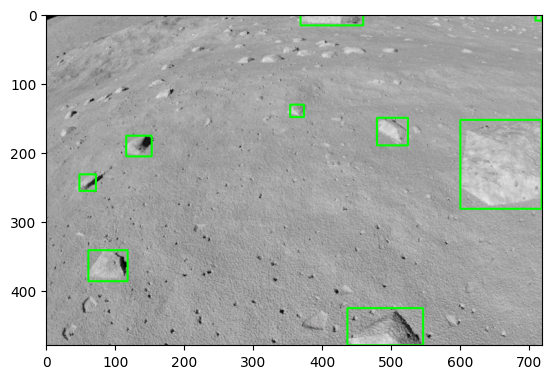

In [20]:
bboxes = []
img_path = 'dataset/original_dataset/images/render/render0002.png'
img =  cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for bbox in grouped_df.get_group('render0002.png').values:
    # print(bbox[1:])    
    bboxes.append(relative_to_absolute(bbox[1:], img.shape))

print([bbox for bbox in bboxes])
absolute_bboxes = [bbox_coords for bbox_coords in bboxes]
image_with_bboxes = draw_bounding_boxes(img, absolute_bboxes)
plt.imshow(image_with_bboxes)
plt.show()

# print(bbox_coords for bbox_coords in bboxes)
# absolute_bboxes = [print(bbox_coords, img.shape) for bbox_coords in [bboxes]]
# image_with_bboxes = draw_bounding_boxes(img.copy(), absolute_bboxes)
# plt.imshow(image_with_bboxes)
# plt.show()